In [45]:
import json
import pandas as pd
import nltk
import re
import numpy as np
import matplotlib.pyplot as plt 
import spacy 
import math
import scipy
import seaborn as sns
import collections

In [84]:
review = pd.read_pickle("C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/review_rester.pkl")
business = pd.read_pickle("C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/Business/business_clean4.pkl")
user = pd.read_pickle("C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/User/user_v1.pkl")

In [93]:
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095628 entries, 0 to 1095627
Data columns (total 28 columns):
user_id                   1095628 non-null object
average_stars             1095628 non-null float64
compliment_cool           1095628 non-null int64
compliment_cute           1095628 non-null int64
compliment_funny          1095628 non-null int64
compliment_hot            1095628 non-null int64
compliment_list           1095628 non-null int64
compliment_more           1095628 non-null int64
compliment_note           1095628 non-null int64
compliment_photos         1095628 non-null int64
compliment_plain          1095628 non-null int64
compliment_profile        1095628 non-null int64
compliment_writer         1095628 non-null int64
cool                      1095628 non-null int64
elite                     1095628 non-null object
fans                      1095628 non-null int64
friends                   1095628 non-null object
funny                     1095628 non-null int64


In [87]:
# I am now interested in user id and review
review_by_user = review.loc[:,['user_id','business_id']]
business_by_user = business.loc[:,['business_id','category_parent']]

In [88]:
category_by_user = review_by_user.merge(business_by_user,on = 'business_id',how = 'left')
category_by_user = category_by_user.dropna()

In [89]:
#Feature: how many different category did this user reviewed

In [90]:
#category_by_user
user_list = pd.DataFrame(category_by_user['user_id'].unique())
user_list.columns = ['user_id']


In [91]:
user_list = category_by_user.groupby('user_id').nunique()

user_list = user_list.loc[:,['business_id','category_parent']]
user_list.reset_index(level=0, inplace=True)
user_list.columns = ['user_id','review_business_count','review_category_parent']
#user_list

In [92]:
user = user.merge(user_list, on = 'user_id', how = 'inner')

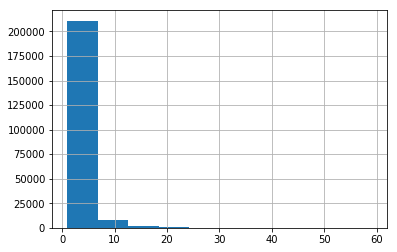

In [17]:
#check correlation
corr = user_v2.corr()
corr


,review_count,useful,friend_count,elite_year_count,yelp_year_count,review_business_count,review_category_parent
review_count,1.000000,0.658279,0.525947,0.706127,0.268799,0.230924,0.233171
useful,0.658279,1.000000,0.592228,0.415765,0.120494,0.165548,0.144754
friend_count,0.525947,0.592228,1.000000,0.433035,0.157478,0.173014,0.176637
elite_year_count,0.706127,0.415765,0.433035,1.000000,0.251010,0.208928,0.234975
yelp_year_count,0.268799,0.120494,0.157478,0.251010,1.000000,0.146362,0.217375
review_business_count,0.230924,0.165548,0.173014,0.208928,0.146362,1.000000,0.833505
review_category_parent,0.233171,0.144754,0.176637,0.234975,0.217375,0.833505,1.000000


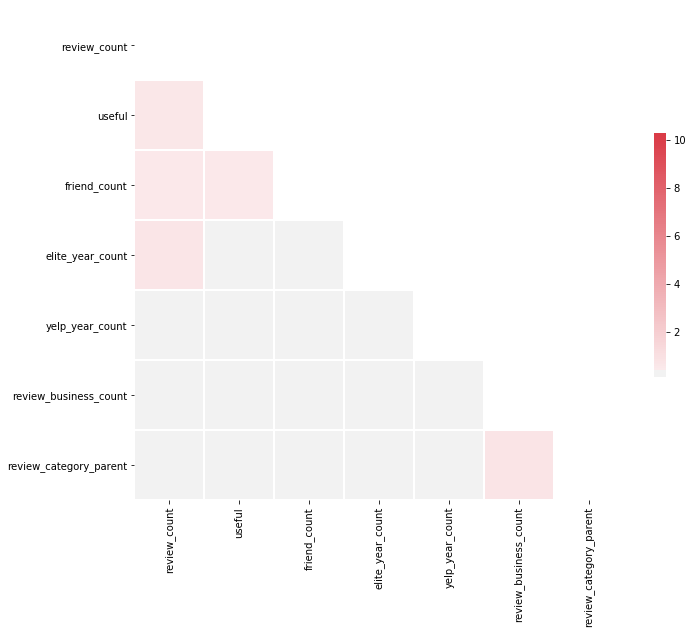

In [18]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=10.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#Data Export 

In [19]:
user.to_pickle("C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/User/user_v2.pkl") 
user_v2.to_pickle("C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/User/user_part_v2.pkl")

#Continuing on User Feature Engineering 

In [72]:
user = pd.read_pickle("C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/User/user_v2.pkl")

In [ ]:
#Feature: How many friends the user have among resteraunt sector 

In [94]:
def adjacent(user):
    user = user[user['friend_count']>0]
    file = open("C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/User/adjacent_2.txt", "w") 
    friends = collections.defaultdict(str)
    for i in user.index:
        friends['user_id'] = user.loc[i,'user_id']
        friends['friends'] = user.loc[i,'friends'].split(', ')
        file.write(json.dumps(friends))
        file.write('\n')

In [95]:
def edges(user):
    file = open("C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/User/edges_v2.txt", "w")
    with open("C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/User/adjacent_2.txt", 'r') as f:
        for line in f:
            data = json.loads(line)
            u = data['user_id']
            friends = data['friends']
            for v in friends:
                file.write(u +' ' +v)
                file.write('\n')

In [96]:
adjacent(user)

In [97]:
edges(user)

In [98]:
edges = pd.read_csv('C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/User/edges_v2.txt',sep=' ',header = None)
edges.columns = ['user_id', 'friends'] 

In [99]:
edges.loc[:,'friend_count'] = 1

# do not run; continuing
user_list = set(user.user_id)
friend_list= set(edges.friends)
Rfriend_list = friend_list.intersection(user_list)
edges.loc[edges.friends.isin(Rfriend_list),'Rfriend_count'] = 1
edges['Rfriend_count'] = edges['Rfriend_count'].apply(lambda x: 0 if x!=1 else x)
restaurant_friends = edges.groupby('user_id')['friend_count','Rfriend_count'].agg('sum').reset_index()


In [100]:
print(len(restaurant_friends['user_id'].unique()))
print(len(user['user_id'].unique()))

1095628
1095628


In [101]:
user = user.merge(restaurant_friends, on = 'user_id')
user

,user_id,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,...,useful,yelping_since,friend_count_x,yelping_since_date,elite_year_count,yelp_year_count,review_business_count,review_category_parent,friend_count_y,Rfriend_count
0,2K62MJ4CJ19L8Tp5pRfjfQ,3.30,5,0,5,0,0,0,1,1,...,58,2014-11-27 22:36:00,127,2014-11-27,2,4.0,45,15,127,41.0
1,A0kENtCCoVT3m7T35zb2Vg,3.66,5,0,5,5,0,2,6,1,...,411,2009-02-15 16:45:34,6,2009-02-15,3,9.0,53,19,6,5.0
2,SuOLY03LW5ZcnynKhbTydA,3.72,8,0,8,3,0,0,3,1,...,150,2014-10-02 14:12:40,43,2014-10-02,4,4.0,76,23,43,31.0
3,lymyUak6KNcNKoDbK87MiQ,1.00,0,0,0,0,0,0,0,0,...,1,2013-02-11 01:43:54,1,2013-02-11,1,5.0,1,1,1,0.0
4,6vU0I5XgCv9OQHZ76rV6qw,3.29,1,1,1,0,0,0,0,0,...,11,2011-03-05 23:31:39,3,2011-03-05,1,7.0,4,3,3,1.0
5,nyL_LfmAaf15o8aj7WHnPw,4.00,0,0,0,0,0,0,0,0,...,0,2016-04-28 15:29:51,1,2016-04-28,1,2.0,4,3,1,0.0
6,-ga7pQvnJcMB1_pIapHQRQ,3.32,1,2,1,1,0,3,5,0,...,58,2014-02-23 15:07:46,99,2014-02-23,2,4.0,41,20,99,60.0
7,agqWketq-FhYwVmRyli4jA,3.86,1,0,1,1,0,0,3,0,...,79,2014-09-30 13:24:38,27,2014-09-30,3,4.0,53,21,27,11.0
8,02AgiiwLg_XAhkvG-wGZKQ,3.64,3,0,3,3,0,0,0,0,...,76,2015-11-28 23:08:15,11,2015-11-28,3,3.0,106,30,11,7.0
9,paYZw5wsS25IzzBZtijB8A,3.23,2,0,2,1,0,1,2,0,...,98,2014-07-30 21:15:31,60,2014-07-30,3,4.0,60,20,60,29.0


In [107]:
user = user.drop(['friend_count_y'], axis=1)

In [108]:
user.columns

Index(['user_id', 'average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool',
       'elite', 'fans', 'friends', 'funny', 'name', 'review_count', 'useful',
       'yelping_since', 'friend_count_x', 'yelping_since_date',
       'elite_year_count', 'yelp_year_count', 'review_business_count',
       'review_category_parent', 'Rfriend_count'],
      dtype='object')

In [69]:
user.columns = ['user_id', 'average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool',
       'elite', 'fans', 'friends', 'funny', 'name', 'review_count', 'useful',
       'yelping_since', 'friend_count_x', 'yelping_since_date',
       'elite_year_count', 'yelp_year_count', 'review_business_count',
       'review_category_parent', 'fr, 'Rfriend_count']

In [82]:
user_v2 = user.loc[:,['user_id', 'average_stars',
       'elite', 'fans', 'friends', 'funny', 'name', 'review_count', 'useful',
       'yelping_since', 'friend_count', 'yelping_since_date',
       'elite_year_count', 'yelp_year_count', 'Rfriend_count','review_business_count','review_category_parent']]

In [71]:
user.to_pickle("C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/User/user_v2.pkl") 
user_v2.to_pickle("C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/User/user_part_v2.pkl")